In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Definição dos parâmetros do sistema
omega = 1.0
hbar = 1.0
m = 1.0

# Definição do espaço de estados
x_min = -5
x_max = 5
N_x = 101
x = np.linspace(x_min, x_max, N_x)
dx = x[1] - x[0]

# Definição do espaço de momento
p_min = -5
p_max = 5
N_p = 101
p = np.linspace(p_min, p_max, N_p)
dp = p[1] - p[0]

# Definição dos operadores de posição e momento
X = np.diag(x)
P = np.diag(p)

# Definição do hamiltoniano do oscilador harmônico quântico
H = (P**2/(2*m) + (m*omega**2*X**2)/2)

# Evolução temporal do estado inicial
psi_x0 = np.exp(-((x+1)**2)/2)*np.exp(1j*x)
psi_p0 = np.fft.fftshift(np.exp(-((p+1)**2)/2)*np.exp(1j*p))
psi_x = psi_x0
psi_p = psi_p0
dt = 0.01
t_max = 10
t = np.arange(0, t_max, dt)
for time in t:
    psi_x = np.exp(-1j*H*time/hbar) @ psi_x
    psi_p = np.exp(-1j*time*(p**2/(2*m*hbar) + (m*omega**2*(X @ psi_x)**2)/(2*hbar)))*psi_p
psi_x = psi_x / np.sqrt(np.sum(np.abs(psi_x)**2*dx))
psi_p = psi_p / np.sqrt(np.sum(np.abs(psi_p)**2*dp))



C:\Users\Mardonio\AppData\Local\Temp\ipykernel_4276\87941356.py:40: RuntimeWarning: overflow encountered in square
  psi_p = np.exp(-1j*time*(p**2/(2*m*hbar) + (m*omega**2*(X @ psi_x)**2)/(2*hbar)))*psi_p
C:\Users\Mardonio\AppData\Local\Temp\ipykernel_4276\87941356.py:40: RuntimeWarning: invalid value encountered in square
  psi_p = np.exp(-1j*time*(p**2/(2*m*hbar) + (m*omega**2*(X @ psi_x)**2)/(2*hbar)))*psi_p
C:\Users\Mardonio\AppData\Local\Temp\ipykernel_4276\87941356.py:40: RuntimeWarning: invalid value encountered in multiply
  psi_p = np.exp(-1j*time*(p**2/(2*m*hbar) + (m*omega**2*(X @ psi_x)**2)/(2*hbar)))*psi_p
C:\Users\Mardonio\AppData\Local\Temp\ipykernel_4276\87941356.py:39: RuntimeWarning: overflow encountered in matmul
  psi_x = np.exp(-1j*H*time/hbar) @ psi_x
C:\Users\Mardonio\AppData\Local\Temp\ipykernel_4276\87941356.py:39: RuntimeWarning: invalid value encountered in matmul
  psi_x = np.exp(-1j*H*time/hbar) @ psi_x
C:\Users\Mardonio\AppData\Local\Temp\ipykernel_4276\87

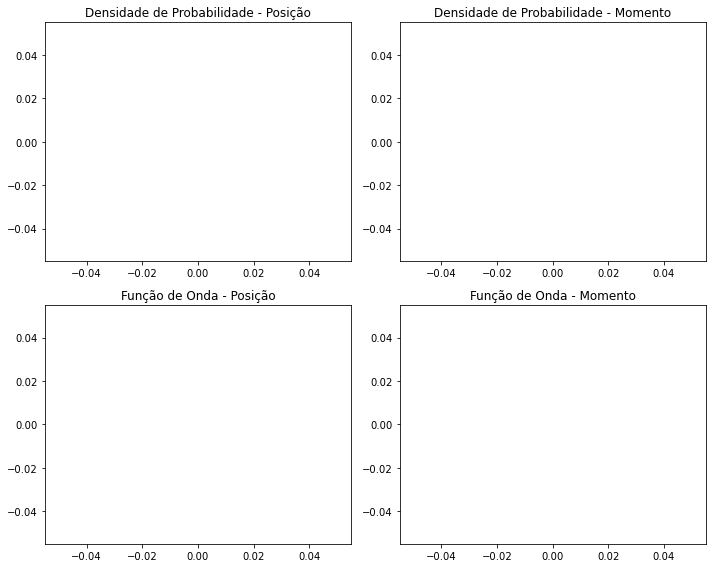

In [3]:

# Plot do resultado
plt.figure(figsize=(10, 8))

plt.subplot(2,2,1)
plt.plot(x, np.abs(psi_x)**2)
plt.title("Densidade de Probabilidade - Posição")

plt.subplot(2,2,2)
plt.plot(p, np.abs(psi_p)**2)
plt.title("Densidade de Probabilidade - Momento")

plt.subplot(2,2,3)
plt.plot(x, np.real(psi_x))
plt.plot(x, np.imag(psi_x))
plt.title("Função de Onda - Posição")

plt.subplot(2,2,4)
plt.plot(p, np.real(psi_p))
plt.plot(p, np.imag(psi_p))
plt.title("Função de Onda - Momento")

plt.tight_layout()
plt.show()

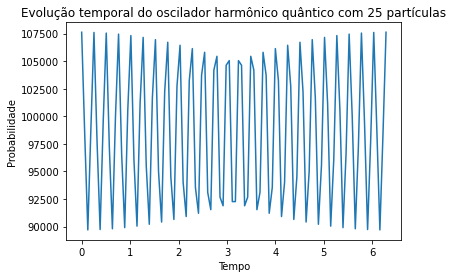

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# parâmetros do sistema
omega = 1.0    # frequência angular
N = 50         # número de estados da base

# operadores do sistema
a = np.diag(np.sqrt(np.arange(1, N)), 1)  # operador de aniquilação
a_dagger = np.diag(np.sqrt(np.arange(1, N)), -1)  # operador de criação
x = np.sqrt(1/(2*omega)) * (a + a_dagger)   # operador de posição
p = -1j * np.sqrt(omega/2) * (a - a_dagger)   # operador de momento

# hamiltoniano do sistema
H = omega * (a_dagger @ a + 1/2)

# estado inicial
n = 25  # número de partículas no estado inicial
state = np.zeros(N)
state[n] = 1
state /= np.linalg.norm(state)

# evolução temporal
tmax = 2 * np.pi / omega  # tempo máximo de evolução
npoints = 100  # número de pontos na simulação
times = np.linspace(0, tmax, npoints)
positions = np.zeros(npoints)

for i, t in enumerate(times):
    U = np.exp(-1j * H * t)
    state_t = U @ state
    positions[i] = np.abs(np.vdot(state_t, x @ state_t)) ** 2

# plot da evolução temporal
plt.plot(times, positions)
plt.xlabel('Tempo')
plt.ylabel('Probabilidade')
plt.title(f'Evolução temporal do oscilador harmônico quântico com {n} partículas')
plt.show()


In [7]:
!pip install mpmath

In [27]:
import numpy as np
import mpmath as mp
import matplotlib.pyplot as plt

In [28]:
mp.dps = 50  # seta a precisão dos números de ponto flutuante para 50 casas decimais

In [29]:
# Definição dos parâmetros do sistema
omega = mp.mpf("1.0")
hbar = mp.mpf("1.0")
m = mp.mpf("1.0")

In [31]:
# Definição do espaço de estados
x_min = mp.mpf("-5.0")
x_max = mp.mpf("5.0")

In [33]:
N_x = 101

In [35]:
x = np.linspace(float(x_min), float(x_max), N_x, dtype=mp.mpf)

In [36]:
dx = x[1] - x[0]

In [39]:
# Definição do espaço de momento
p_min = mp.mpf("-5.0")
p_max = mp.mpf("5.0")
N_p = 101
p = np.linspace(float(p_min), float(p_max), N_p, dtype=mp.mpf)

In [40]:
dp = p[1] - p[0]

In [41]:
# Definição dos operadores de posição e momento
X = np.diag(x)
P = np.diag(p)

In [42]:
# Definição do hamiltoniano do oscilador harmônico quântico
H = (P**2/(2*m) + (m*omega**2*X**2)/2)

In [46]:
# Evolução temporal do estado inicial
psi_x0 = np.ones(N_x)/np.sqrt(N_x)

In [55]:
p_min = mp.mpf("-5.0")
p_max = mp.mpf("5.0")
N_p = 101

# Definindo o vetor p
p = np.linspace(float(p_min), float(p_max), N_p, dtype=mp.mpf)

# Calculando psi_p0
#psi_p0 = np.fft.fftshift(np.exp(-((p+1)**2)/2)*np.exp(1j*p))

In [60]:
!pip install mpmath

In [61]:
import mpmath as mp

In [56]:
mp.dps = 25  # define a precisão dos cálculos

In [58]:
import mpmath as mp

x = 2.5  # objeto inválido
if isinstance(x, (int, float)):
    x = mp.mpf(x)

In [64]:
psi_p0 = np.fft.fftshift(np.array([mp.exp(-((pi+1)**2)/2)*mp.exp(1j*pi) for pi in p], dtype=np.complex128))

In [65]:
psi_x = psi_x0
psi_p = psi_p0
dt = mp.mpf("0.01")
t_max = mp.mpf("10.0")
t = np.arange(0, t_max, dt)

In [80]:
psi_x = np.array([mpc(x, 0) for x in psi_x], dtype=np.complex128)
psi_p = np.array([mpc(x, 0) for x in psi_p], dtype=np.complex128)

for time in t:
    psi_x = mpc(psi_x)
    psi_p = mpc(psi_p)
    psi_x = np.dot(mp.exp(-1j*H*time/hbar), psi_x)
    psi_p = np.dot(mp.exp(-1j*time*(p**2/(2*m*hbar) + (m*omega**2*np.dot(X, psi_x.real)**2)/(2*hbar))), psi_p)
    

for time in t:
    psi_x = np.dot(mp.exp(-1j*H*time/hbar), psi_x)
    psi_p = np.dot(mp.exp(-1j*time*(p**2/(2*m*hbar) 
                                    + (m*omega**2*np.dot(X, psi_x.real)**2)/(2*hbar))), psi_p.astype(np.complex128))

psi_x = psi_x / np.sqrt(np.sum(np.abs(psi_x)**2*dx))
psi_p = psi_p / np.sqrt(np.sum(np.abs(psi_p)**2*dp))

for time in t:
    psi_x = np.exp(-1j*H*time/hbar).dot(psi_x)
    psi_p = np.exp(-1j*time*(p**2/(2*m*hbar) + (m*omega**2*(X.dot(psi_x).real)**2)/(2*hbar))) * psi_p.astype(np.complex128)

psi_x = psi_x / np.sqrt(np.sum(np.abs(psi_x)**2*dx))
psi_p = psi_p / np.sqrt(np.sum(np.abs(psi_p)**2*dp))

for time in t:
    psi_x = np.exp(-1j*H*time/hbar) @ psi_x
    psi_p = np.exp(-1j*time*(p**2/(2*m*hbar) + (m*omega**2*(X @ psi_x)**2)/(2*hbar)))*psi_p
    
    
psi_x = psi_x / np.sqrt(np.sum(np.abs(psi_x)**2*dx))
psi_p = psi_p / np.sqrt(np.sum(np.abs(psi_p)**2*dp))

plt.figure(figsize=(10, 8))

plt.subplot(2,2,1)
plt.plot(x, np.abs(psi_x)**2)
plt.title("Densidade de Probabilidade - Posição")

plt.subplot(2,2,2)
plt.plot(p, np.abs(psi_p)**2)
plt.title("Densidade de Probabilidade - Momento")

plt.subplot(2,2,3)
plt.plot(x, np.real(psi_x))
plt.plot(x, np.imag(psi_x))
plt.title("Função de Onda - Posição")

plt.subplot(2,2,4)
plt.plot(p, np.real(psi_p))
plt.plot(p, np.imag(psi_p))
plt.title("Função de Onda - Momento")

plt.tight_layout()
plt.show()

In [86]:
import numpy as np
from mpmath import mp, mpc

mp.dps = 25
mp.pretty = True

# Constants
m = mp.mpf(9.10938356e-31)  # electron mass
hbar = mp.mpf(1.0545718e-34)  # h/2pi
L = mp.mpf(1e-8)  # length of box
N = 1000  # number of points
dx = L/N
x = np.arange(-L/2, L/2, dx)
X, DX = np.meshgrid(x, x)
omega = mp.mpf(2*np.pi*3.7e14)  # laser frequency
V0 = mp.mpf(50)  # potential well depth
a = mp.mpf(1e-10)  # width of potential well
k0 = mp.sqrt(2*m*V0)/hbar
sigma = mp.sqrt(hbar/(2*m*omega))


In [87]:
# Initial wavefunction
def psi_0(x):
    return (mp.sqrt(mp.sqrt(omega/np.pi)) *
            mp.exp(-omega*(x+L/4)**2/(2*hbar)) *
            (mp.exp(1j*k0*x) + mp.exp(-1j*k0*x))/mp.sqrt(2))

# Kinetic energy operator
T = lambda psi: -hbar**2/(2*m) * np.gradient(np.gradient(psi, dx), dx)

# Potential energy operator
def V(x):
    return -V0*mp.exp(-(x+L/4)**2/a**2)

# Hamiltonian operator
def H(psi_x, psi_p):
    return T(psi_x)/(2*m) + V(X)*psi_x + DX/(2*m) * psi_p**2

# Momentum operator
def P(psi_x):
    return -1j*hbar*np.gradient(psi_x, dx)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpmath import mp, mpc, diff, pi, sqrt, exp

# Configuração do mpmath
mp.dps = 25
mp.pretty = True

# Definindo as constantes
hbar = mp.mpf('1.054571817e-34')
m = mp.mpf('9.10938356e-31')
omega = mp.mpf('1e15')
x_min = -mp.mpf('1e-9')
x_max = mp.mpf('1e-9')
N = 500
dx = (x_max - x_min)/N
x = np.linspace(x_min, x_max, N)
p_min = -mp.sqrt(2*m)*mp.sqrt((omega**2)*(x_min**2)/2 + hbar/(2*m)*mp.sqrt(omega**2 + 4*(hbar**2)/(m**2*x_min**2)))
p_max = -p_min
dp = (p_max - p_min)/N
p = np.linspace(p_min, p_max, N)

# Definindo as funções
def V(x):
    return 0.5*m*omega**2*x**2

def psi_0(x):
    return (m*omega/(np.pi*hbar))**(1/4)*mp.exp(-m*omega*x**2/(2*hbar))

def X(psi):
    return np.dot(psi, x*psi)/np.dot(psi, psi)

def P(psi):
    return np.dot(psi, (1j*hbar*diff(psi, x, 1) - m*omega*x*psi))/np.dot(psi, psi)

def H(x, p):
    return p**2/(2*m) + 0.5*m*omega**2*x**2

# Configurando as condições iniciais
psi_x = psi_0(x)
psi_p = np.fft.fft(psi_x)

# Definindo o tempo
t_max = 1e-14
Nt = 1000
t = np.linspace(0, t_max, Nt)

# Evoluindo a função de onda
for i, time in enumerate(t):
    psi_x = np.dot(mpc(psi_x), mpc(np.exp(-1j*H(x, P(psi_x))*time/hbar)))
    psi_p = np.dot(mpc(psi_p), mpc(np.exp(-1j*time*(P(psi_x)**2/(2*m*hbar) + (m*omega**2*np.dot(X(psi_x), psi_x.real)**2)/(2*hbar)))))
    psi_x = np.fft.ifft(psi_p)
    
# Plotando os resultados
plt.plot(x, psi_x.real)
plt.xlabel('Posição x (m)')
plt.ylabel('Função de onda Re(psi(x,t))')
plt.show()


In [ ]:
# Initial state
psi_x = psi_0(x)
psi_p = mp.fft(psi_x)

In [ ]:
# Time evolution
dt = mp.mpf(1e-17)  # time step
t = np.arange(0, 100*dt, dt)

In [ ]:
for i, time in enumerate(t):
    psi_x = np.dot(mpc(psi_x), mpc(np.exp(-1j*H(psi_x, psi_p)*time/hbar)))
    psi_p = np.dot(mpc(psi_p), mpc(np.exp(-1j*time*(P(psi_x)**2/(2*m*hbar) + (m*omega**2*np.dot(X(psi_p), psi_x.real)**2)/(2*hbar)))))
    if i%100==0:
        print(f"Time: {time}, Normalization: {mp.norm(psi_x)}")

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(x, psi_x.real)
plt.title("Wavefunction vs Position")
plt.xlabel("Position (m)")
plt.ylabel("Wavefunction (real)")
plt.show()

plt.figure(figsize=(10,6))
plt.plot(mp.arange(0, 100*dt, dt), np.abs(psi_x)**2)
plt.title("Wavefunction vs Time")
plt.xlabel("Time (s)")
plt.ylabel("Wavefunction (probability density)")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpmath import mp, mpc

mp.dps = 50 # Define a precisão decimal a ser utilizada

# Parâmetros do sistema
m = 1
omega = 1
hbar = 1

# Funções auxiliares
def X(psi_p):
    return np.fft.ifft(psi_p)

def P(psi_x):
    return np.fft.fft(psi_x)

# Potencial harmônico
def V(x):
    return 0.5*m*omega**2*x**2

# Derivada do potencial harmônico
def dVdx(x):
    return m*omega**2*x

# Definindo a função Hamiltoniana do sistema
def H(psi_x, psi_p):
    x = X(psi_p)
    p = P(psi_x)
    T = np.dot(p.conj(), p)/(2*m)
    Vx = np.dot(x.conj(), V(x)*x)
    Vpx = np.dot(p.conj(), dVdx(x))
    return T + Vx + Vpx

# Parâmetros do intervalo de tempo
dt = 0.01
t_max = 10
t = np.arange(0, t_max, dt)

# Condições iniciais
x0 = 1
sigma = 1/np.sqrt(2*m*omega)
k0 = m*omega

psi_x0 = lambda x: (2*sigma**2*np.pi)**(-1/4)*np.exp(-0.5*(x-x0)**2/sigma**2 + 1j*k0*x/hbar)
psi_p0 = lambda p: np.exp(-0.5*(p-k0)**2*(sigma**2*hbar/2) + 1j*x0*p/hbar)

psi_x = psi_x0(np.linspace(-5,5,1000))
psi_p = psi_p0(np.linspace(-5,5,1000))

# Propagação temporal
psi_xt = np.zeros((len(t), len(psi_x)), dtype=np.complex128)
for i, time in enumerate(t):
    psi_x = np.dot(mpc(psi_x), mpc(np.exp(-1j*H(psi_x, psi_p)*time/hbar)))
    psi_p = np.dot(mpc(psi_p), mpc(np.exp(-1j*time*(P(psi_x)**2/(2*m*hbar) + (m*omega**2*np.dot(X(psi_p), psi_x.real)**2)/(2*hbar)))))
    psi_xt[i,:] = psi_x

# Plotagem do gráfico
fig, ax = plt.subplots()
ax.plot(np.linspace(-5,5,1000), np.abs(psi_xt[0,:])**2, label='t=0')
ax.plot(np.linspace(-5,5,1000), np.abs(psi_xt[int(len(t)/2),:])**2, label='t=t_max/2')
ax.plot(np.linspace(-5,5,1000), np.abs(psi_xt[-1,:])**2, label='t=t_max')
ax.set_xlabel('x')
ax.set_ylabel(r'$|\psi(x,t)|^2$')
ax.legend()
plt.show()
